In [1]:
%load_ext autoreload
%autoreload 2
import plotly.graph_objects as go
import pandas as pd
from autograd import grad
import autograd.numpy as np
from ObjectiveFunction import ObjectiveFunction as of
from Optimiser import GradientDescent
import itertools

In [115]:
centers = [np.array([-6,4]), np.array([5,-2]), np.array([-4,-4])]
depths = [-0.05, -0.06, -0.04]
sigmas = [2, 3, 5.5]
objfunc = of(of.gaussian_wells, centers=centers, depths=depths, sigmas=sigmas)

In [116]:
X = np.arange(-25, 26, 0.1)
Y = np.arange(-25, 26, 0.1)
grid = [np.array(_) for _ in itertools.product(X,Y)]
Z = [objfunc.eval(_) for _ in grid]
Z = np.array(Z).reshape(len(X), len(Y)).T

In [117]:
gd = GradientDescent(objfunc, 5000, 100)
path = gd.optimise(np.array([-3.8, -6]))

In [118]:
fig = go.Figure()
fig.add_trace(go.Surface(x=X, y=Y, z=Z))
fig.add_trace(go.Scatter3d(x=path[0][0], y=path[0][1], z=path[1]))
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
fig.show()

<AxesSubplot:>

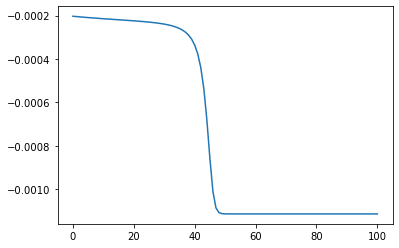

In [119]:
pd.Series(path[1]).plot()

In [44]:
objfunc.eval(np.array([1.699009,-3.499056]))

-0.0005112169943714601

In [53]:
from autograd import elementwise_grad as egrad

In [81]:
def wtf(*args):
    return args[0]**2 + 3*args[1]

g = egrad(wtf, 0)

In [82]:
g(1.0, 0.0)

2.0

In [72]:
def tf(*args):
    return args

In [2]:
import pybenchfunction as bench

In [5]:
any_dim_functions = bench.get_functions(None)

In [8]:
any_dim_functions[0]

pybenchfunction.function.Ackley